In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
nobel= pd.read_csv("nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [4]:
nobel.drop(columns=
    ["organization_name",
    "organization_city",
    "organization_country",
    "death_date",
    "death_city",
    "death_country",
    "motivation"],inplace=True)

In [5]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           1000 non-null   int64 
 1   category       1000 non-null   object
 2   prize          1000 non-null   object
 3   prize_share    1000 non-null   object
 4   laureate_id    1000 non-null   int64 
 5   laureate_type  1000 non-null   object
 6   full_name      1000 non-null   object
 7   birth_date     968 non-null    object
 8   birth_city     964 non-null    object
 9   birth_country  969 non-null    object
 10  sex            970 non-null    object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


**_What is the most commonly awarded gender and birth country?_**

In [6]:
nobel["sex"].unique()

array(['Male', 'Female', nan], dtype=object)

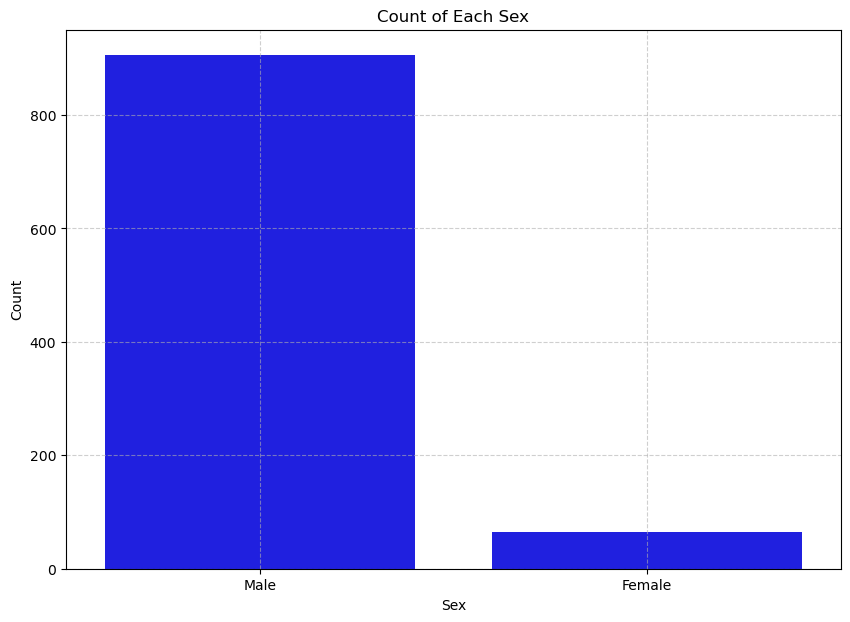

In [7]:
plt.figure(figsize=(10, 7))  
sns.countplot(x="sex", data=nobel, color="blue")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Count of Each Sex")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [8]:
top_country=nobel["birth_country"].value_counts().index[0]


In [9]:
top_country

'United States of America'

In [10]:
top_gender=nobel["sex"].value_counts().index[0]


In [11]:
top_gender

'Male'

_**Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?**_

In [12]:
nobel["US_winner"]= nobel["birth_country"]== "United States of America"

In [13]:
nobel["decade"]= (np.floor(nobel["year"]/10)*10).astype("int")

In [14]:
us_winner=(nobel.groupby("decade", as_index=False)["US_winner"].mean())

In [15]:
us_winner

,decade,US_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


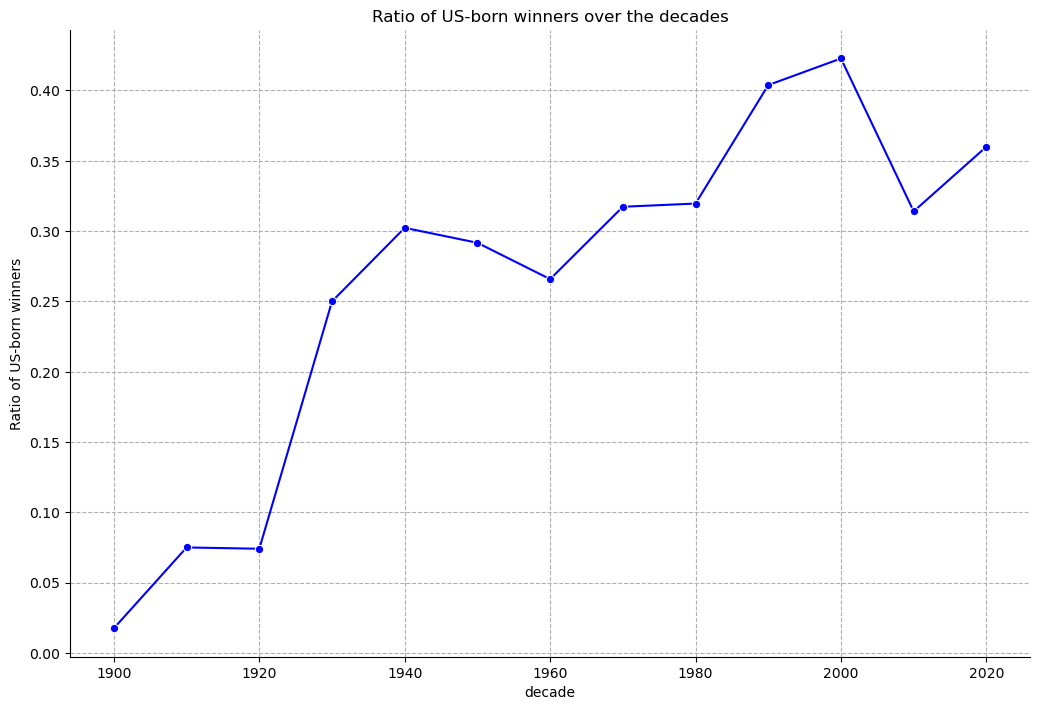

In [16]:
sns.relplot(x="decade", y="US_winner", kind="line", data=us_winner, color= "blue", height=7, aspect=1.5, marker="o")
plt.title("Ratio of US-born winners over the decades")
plt.ylabel("Ratio of US-born winners")
plt.grid(True, linestyle="--")
plt.show()


In [17]:
max_decade_usa=us_winner[us_winner["US_winner"]==us_winner["US_winner"].max()]["decade"].values[0]

In [18]:
max_decade_usa=2000

_**Which decade and Nobel Prize category combination had the highest proportion of female laureates?**_

In [19]:
nobel["sex"].unique()

array(['Male', 'Female', nan], dtype=object)

In [20]:
nobel["Female_winner"]= nobel["sex"]== "Female"

In [21]:
female_winner=(nobel.groupby(["decade","category"], as_index=False)["Female_winner"].mean())

In [22]:
female_winner

,decade,category,Female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


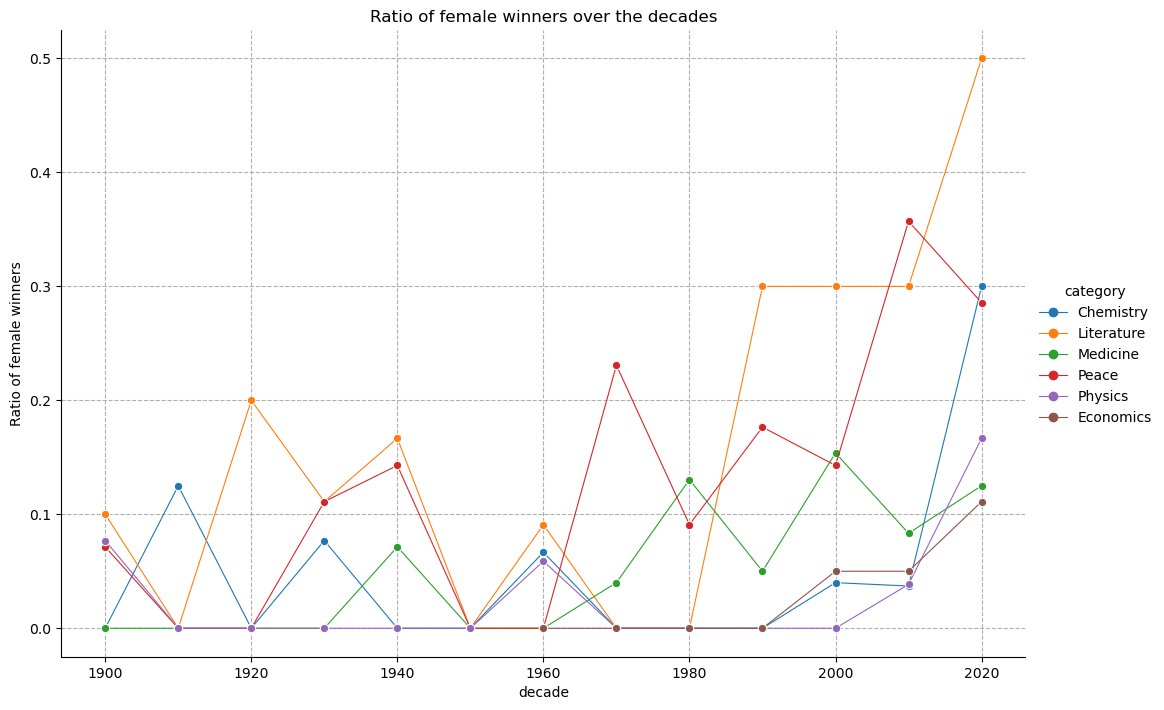

In [23]:
sns.relplot(x="decade", y="Female_winner", kind="line", data=female_winner,hue="category", height=7, aspect=1.5, marker="o", linewidth=0.8)
plt.title("Ratio of female winners over the decades")
plt.ylabel("Ratio of female winners")
plt.grid(True, linestyle="--")
plt.show()

In [24]:
max_female_dict={female_winner[female_winner["Female_winner"]==female_winner["Female_winner"].max()]["decade"].values[0] : female_winner[female_winner["Female_winner"]==female_winner["Female_winner"].max()]["category"].values[0]}

In [25]:
max_female_dict

{2020: 'Literature'}

_**Who was the first woman to receive a Nobel Prize, and in what category?**_

In [26]:
first_woman_name=nobel.sort_values("year")[nobel.sort_values("year")["sex"]=="Female"]["full_name"].values[0]

In [27]:
first_woman_name

'Marie Curie, née Sklodowska'

In [28]:
first_woman_category=nobel.sort_values("year")[nobel.sort_values("year")["sex"]=="Female"]["category"].values[0]

In [29]:
first_woman_category

'Physics'

_**Which individuals or organizations have won more than one Nobel Prize throughout the years?**_

In [30]:
repeat_list=list(nobel["full_name"].value_counts()[nobel["full_name"].value_counts() >= 2].index)

In [31]:
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']